In [1]:
import numpy as np

In [2]:
# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from math import sqrt

In [4]:
import sympy as sp

In [5]:
from sympy.plotting import plot3d

In [6]:
from sympy.plotting.plot import MatplotlibBackend, Plot

In [7]:
x1 = sp.symbols("x1")

In [8]:
x2 = sp.symbols("x2")

In [9]:
f = x1**2 + 2*x2**2 - 4*x1 + 2*x2
#f = 2*x1**2 + x2**2 - 12*x1

In [10]:
def dfdx1(f, x1):
    return sp.diff(f, x1)

In [11]:
def dfdx2(f, x2):
    return sp.diff(f, x2)

In [12]:
def norm_grad(grad, x1, x2, x01, x02):
    s = 0
    for d in grad:
        s += d.subs([(x1, x01), (x2, x02)])**2
    return sqrt(s)

In [13]:
eps = 10**(-2)

In [14]:
#x01 = 5
x01 = 1

In [15]:
#x02 = 3
x02 = 0

In [16]:
H = sp.hessian(f, [x1, x2]).subs([(x1, x01), (x2, x02)])

In [17]:
def gradient_descent(xi1, xi2, H):
    x01 = xi1
    x02 = xi2
    
    max_iterations = 1000
    
    exit = False
    iteration = 0
    while not exit:
        iteration += 1
        
        x0 = sp.Matrix([[x01, x02]])
        gradient = lambda f, v: sp.Matrix([f]).jacobian(v)
        grad = gradient(f, [x1, x2])
        xi = x0 - grad.subs([(x1, x0[0]), (x2, x0[1])])*(H.inv())
     
        if norm_grad(grad, x1, x2, xi[0], xi[1]) < eps:
            exit = True
            break
            
        if iteration >= max_iterations:
            break
            
        x01 = xi1
        x02 = xi2
                
    f0 = f.subs({x1: xi[0], x2: xi[1]})           
    return xi[0], xi[1], f0

In [18]:
x1_res, x2_res, f_res = gradient_descent(x01, x02, H)

In [19]:
print(x1_res, x2_res, f_res)

2 -1/2 -9/2


In [20]:
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt

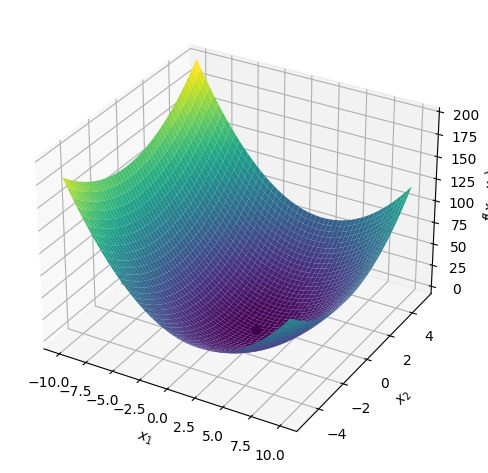

In [21]:
p = plot3d(f, (x1, -10, 10), (x2, -5, 5), show=False)
plt = get_sympy_subplots(p)
plt.plot(x1_res, x2_res, f_res, 'o', color='k')